In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as scio
# with h5py.File('spike_train.mat', 'r') as f:
#     ref_spike_train = f['spike_train'][()]



In [2]:
spike_data = scio.loadmat('D:\mbl_mouse_2025\BenIgnitius\preprocessed\B4-2025-07-07\clean_units_imec0.mat')


In [3]:
spike_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'depths', 'unit_ids', 'channel_ids', 'spike_train', 'shank_ids', 'mean_waveforms', 'peak_amp', 'valley_amp'])

In [18]:
# spike_trains = [x[0].squeeze() for x in spike_data['spike_train']]
spike_trains = [x.squeeze() for x in spike_data['spike_train'][0]]

In [5]:
%matplotlib widget

In [41]:
# Code to load stim_times
stim_times = np.loadtxt('D:\mbl_mouse_2025\BenIgnitius\preprocessed\B4-2025-07-07\XA1_ON.txt', dtype='float')
con_indices = [1,3,5,7,9,11,13,15,17,19]
pos_indices = [0,6,8,12,16]
neg_indices = [2,4,10,14,18]
exp_end = stim_times[20] - 5

In [ ]:
# Code to plot trialized rasters for control condition
pre = 2
post = 10
this_spike_train = spike_trains[0]
control_spike_train = []
for idx in con_indices:
    this_stim = stim_times[idx]
    keep = (this_spike_train>this_stim-pre) & (this_spike_train<this_stim+post)
    this_control_spike_train = this_spike_train[keep]
    control_spike_train.append(this_control_spike_train)

In [ ]:
control_spike_train2 = np.hstack(control_spike_train)

In [ ]:
pre, post = 20, 20

spike_train = spike_trains[0]
con_aligned_spike_trains = []
for idx in con_indices:
    this_stim = stim_times[idx]
    keep = (spike_train>this_stim-pre) & (spike_train<this_stim+post)
    this_con_spike_train = spike_train[keep]
    this_con_spike_train -= this_stim
    con_aligned_spike_trains.append(this_con_spike_train)
    
fig, ax = plt.subplots(10,1)

for i,st in enumerate(con_aligned_spike_trains):
    ax[i].scatter(st, np.ones_like(st), marker='|')
    # ax[i].title(f'Control stim #{i+1}')
    ax[i].set_xlim(-20,20)
    ax[i].set_yticks([])
plt.show()
# for spike_train in spike_trains:
#     plt.scatter(spike_train, np.ones_like(spike_train), marker = '|')
#     plt.scatter(control_spike_train2, np.zeros_like(control_spike_train2), marker = '|')
#     break
# for idx in con_indices:
#     plt.axvline(stim_times[idx], ymin=-1, ymax=2)
# plt.show()

In [ ]:
len(spike_trains[0])

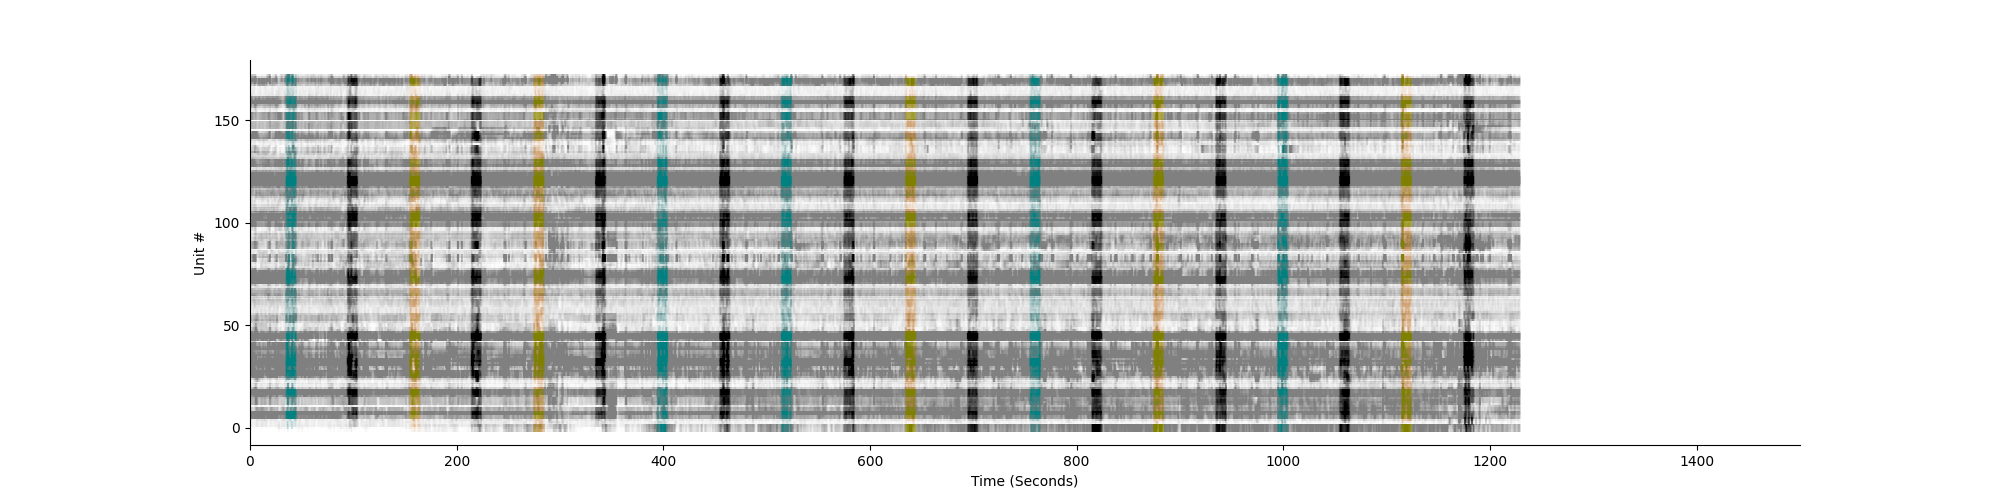

In [88]:
# pre, post = 10, 50

def get_stim_trials(spike_train, stim_index, stim_times):
    pre, post = 0, 10
    aligned_spike_trains_idx = []
    for idx in stim_index:
        this_stim = stim_times[idx]
        keep = (spike_train>this_stim-pre) & (spike_train<this_stim+post)
        keep = np.where(keep == True)
        # this_spike_train = spike_train[keep]
        #this_pos_spike_train -= this_stim
        # aligned_spike_trains.append(this_spike_train)
        aligned_spike_trains_idx.append(keep)
    return np.hstack(aligned_spike_trains_idx)

# spike_train = spike_trains[0]
# pos_aligned_spike_trains = []
# for idx in pos_indices:
#     this_stim = stim_times[idx]
#     keep = (spike_train>this_stim-pre) & (spike_train<this_stim+post)
#     this_pos_spike_train = spike_train[keep]
#     #this_pos_spike_train -= this_stim
#     pos_aligned_spike_trains.append(this_pos_spike_train)

# neg_aligned_spike_trains = []
# for idx in neg_indices:
#     this_stim = stim_times[idx]
#     keep = (spike_train>this_stim-pre) & (spike_train<this_stim+post)
#     this_neg_spike_train = spike_train[keep]
#     #this_neg_spike_train -= this_stim
#     neg_aligned_spike_trains.append(this_neg_spike_train)

# con_aligned_spike_trains = []
# for idx in con_indices:
#     this_stim = stim_times[idx]
#     keep = (spike_train>this_stim-pre) & (spike_train<this_stim+post)
#     this_con_spike_train = spike_train[keep]
#     #this_con_spike_train -= this_stim
#     con_aligned_spike_trains.append(this_con_spike_train)

plt.close('all')
fig, ax = plt.subplots(1,1, figsize=(20,5))



for i, neuron in enumerate(spike_trains):
    # keep = get_stim_trials(neuron, con_indices, stim_times)
    neuron_window = neuron[neuron < exp_end]
    # print(neuron_window.shape)
    neuron_trials = [get_stim_trials(neuron_window, indices, stim_times) for indices in [con_indices, pos_indices, neg_indices]]
    
    # print(len(keep), len(neuron))
    # print(i, neuron)
    #keep = (neuron >= 25) & (neuron < 35)
    ax.scatter(neuron_window, i*np.ones_like(neuron_window), marker='|', linewidths=0.1,  color = 'gray', alpha=0.1)
    ax.scatter(neuron_window[neuron_trials[0]], i*np.ones_like(neuron_window[neuron_trials[0]]), marker='|', linewidths=0.1,  color = 'black', alpha=0.1)
    ax.scatter(neuron_window[neuron_trials[1]], i*np.ones_like(neuron_window[neuron_trials[1]]),  marker='|', linewidths=0.1,  color = 'teal', alpha=0.1)
    ax.scatter(neuron_window[neuron_trials[2]], i*np.ones_like(neuron_window[neuron_trials[2]]),  marker='|', linewidths=0.1,  color = 'orange', alpha=0.1)
    ax.set_xlabel('Time (Seconds)')
    ax.set_ylabel('Unit #')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlim(0,1500)
    ax.set_yticks([0,50,100,150])
    
# for i,st in enumerate(pos_aligned_spike_trains):
#     ax[i].scatter(st, np.ones_like(st), marker='|')
#     # ax[i].title(f'Control stim #{i+1}')
#     ax[i].set_xlim(-20,20)
#     ax[i].set_yticks([])
# plt.show()
# for spike_train in spike_trains:
#     plt.scatter(spike_train, np.ones_like(spike_train), marker = '|')
#     plt.scatter(control_spike_train2, np.zeros_like(control_spike_train2), marker = '|')
#     break
# for idx in con_indices:
#     plt.axvline(stim_times[idx], ymin=-1, ymax=2)
# plt.show()

In [31]:
con_aligned_spike_trains

[array([ 85.41523333,  85.57093333,  85.79146667,  87.36713333,
         87.71993333,  87.7652    ,  87.83943333,  88.91493333,
         89.06336667,  90.8973    ,  90.983     ,  91.39376667,
         91.77036667,  91.90136667,  92.12306667,  92.917     ,
         92.94856667,  92.96286667,  93.10456667,  93.61483333,
         93.77313333,  93.94853333,  94.05493333,  94.07276667,
         95.41846667,  95.84166667,  97.3353    ,  97.40026667,
         97.4345    ,  98.27386667,  98.47336667, 101.67296667,
        110.1034    , 111.61263333, 111.79306667, 112.14126667,
        112.17473333, 112.2321    , 112.29496667, 112.3505    ,
        113.07836667, 113.63533333, 114.00773333, 116.41946667,
        119.06866667, 137.94066667, 140.29123333]),
 array([204.352     , 204.61696667, 205.31903333, 205.8229    ,
        206.02753333, 206.8002    , 207.9115    , 208.10006667,
        208.2479    , 209.06273333, 209.86503333, 210.3065    ,
        210.47116667, 210.5587    , 210.8176    , 21

In [ ]:
fig = plt.figure()
ax = plt.subplot(10,1,1)
for spike_train in spike_trains:
    
    plt.scatter(spike_train, np.ones_like(spike_train), marker = '|')
    plt.scatter(control_spike_train2, np.zeros_like(control_spike_train2), marker = '|')
    break
for idx in con_indices:
    plt.axvline(stim_times[idx], ymin=-1, ymax=2)
plt.show()